# Importación de librerías

In [1]:
# Importar librerías necesarias
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split #Para separar los datos de entrenamiento y los de val.
#%matplotlib inline En otros editores como Jupyter lab para que las gráficas salgan entre las celdas

In [2]:
print(cv2.__version__)

4.1.2


# Se baja el dataset desde el Drive propio o el Github

In [3]:
#Si fuera Local:
#iris_dataset = pd.read_csv('Iris.csv')

#Para google colab:
#drive.mount('/content/drive')

#Se carga el dataset desde el github personal:
url="https://raw.githubusercontent.com/felipetobars/KNNiris_test/master/Iris.csv"

Para cargarlo desde drive se debe copiar y pegar el enlace de acceso de la anterior linea y especificar la ruta donde se encuentra en el drive den al variable iris_dataset

In [4]:
#Desde drive:
#iris_dataset = pd.read_csv('/content/drive/My Drive/ESPECIALIZACIÓN/Machine Learning/1S/MACHINE LEARNING/1ra semana/Iris.csv')
#Ya queda como dataframe

Para cargarlo desde Github 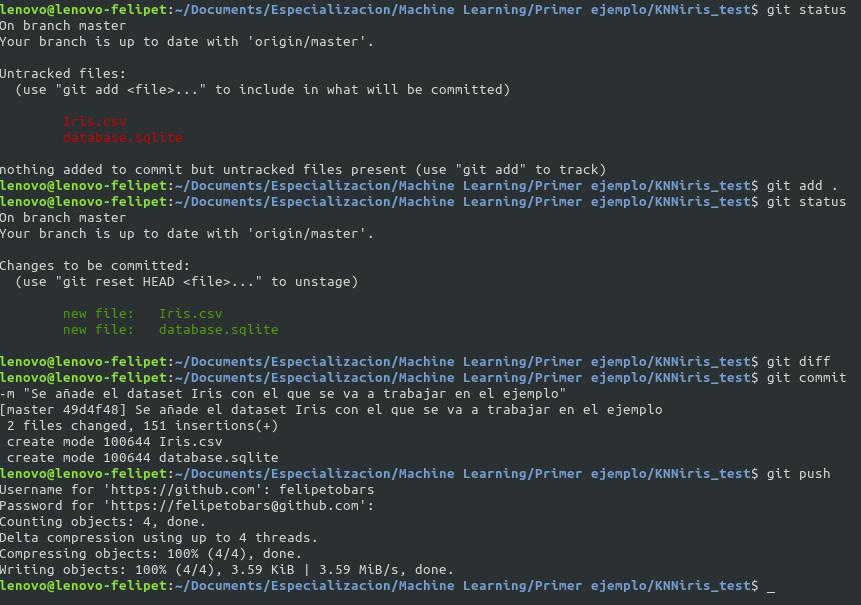

Se pasa la variable url como argumento a la función pd.read_csv

In [5]:
#Desde el github:
iris_dataset = pd.read_csv(url)

# Se preparan los datos del dataset antes de procesarlos

In [6]:
iris_dataset.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#Se separan los datos en matriz de características para relaizar el entreno
print("Target names:", iris_dataset['Species'],'\n')
print("Target names:", np.unique(iris_dataset['Species']),'\n')
print("Feature names:\n", iris_dataset.keys()[1:5])

Target names: 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object 

Target names: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 

Feature names:
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [8]:
X = iris_dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]#Features
print(X,"\n") #Con X.loc[0:4,:] se puede mostrar por filas, de la 0 a 4 (0:4) y todas las columnas (:)
Y= iris_dataset['Species'][:]#Target values  >El [:] es para extraer todos los valores del arreglo (de pandas a numpy)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iri

In [9]:
#Se ve el tamaño del dataset
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [10]:
Y=Y.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
#y=pd.factorize(Y)  #otra forma usando pandas de pasar de un arreglo str a numérico
# lo anterior genera un arreglo con dos arreglos, en uno está el que se necesita y en otro la info de que numero corresponde a cual str
display(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# Visualizavión con Scatter matrix

In [11]:
#Librería que no viene en Google Colab
!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1e251ddde1796c13dcf6d2a1e2f67fbdd1a57e70317c817637dc5df79d1ba63a
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


**Se divide el dataset en datos de train y de test**

In [12]:
#Se usa el train_test_split para separar los datos de entreno y los de validación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81a1446f28>,
      dtype=object)

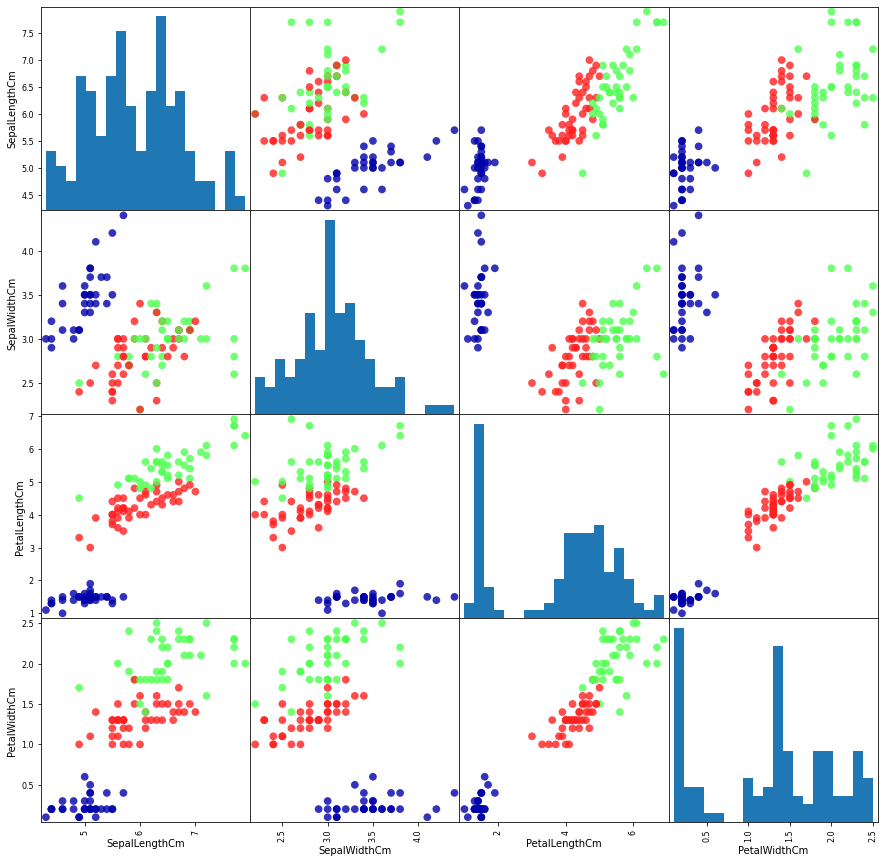

In [13]:
# Se crea el dataframe de los datos en la variable X_train
# Los nombres de las columnas son los feature names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.keys()[1:5])
# Se crea el scratter matrix desde el dataframe
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

# Análisis de complejidad con K Nearest Neightbor Algorithm

**Usando metric de la librería de sklearn para hallar mejor accuracy**

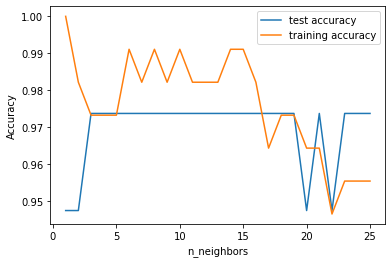

In [14]:
# Se importa la clase KneigborsClassifier desde sklearn
from sklearn.neighbors import KNeighborsClassifier

#Se importa las métricas del modelo para comprobar el accuracy
from sklearn import metrics
#Se prueba cambiando el valor del hiperparámetro de 1 a 25, y se guarda los accuracy que se van obteniendo
k_rango= range(1,26)
puntajes_train=[]
puntajes_test=[]

for k in k_rango:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train,y_train)
  y_predic=clf.predict(X_test)
  z_predic=clf.predict(X_train)
  puntajes_test.append(metrics.accuracy_score(y_test,y_predic))
  puntajes_train.append(metrics.accuracy_score(y_train,z_predic))

plt.plot(k_rango,puntajes_test,label="test accuracy")
plt.plot(k_rango,puntajes_train,label="training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

**Usando sólo la función .score() vista en clase para hallar mejor accuracy**

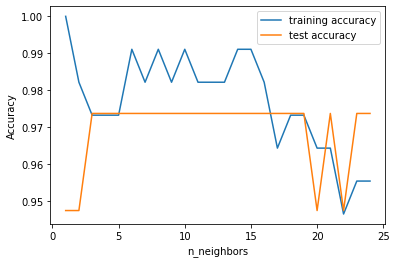

In [15]:
# Se importa la clase KneigborsClassifier desde sklearn
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# se varía los valores del hiperparámetro n_neighbors del 1 al 10
neighbors_settings = range(1, 25)

for vecino in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=vecino)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Entreno con valor del n_neighbor óptimo

Como se ve en las gŕaficas anteriores el accuracy entre el valor de n_neighbors de 3 y de 19 se mantiene constante, por lo cual se puede llegar a elegir algún valor dentro de ese rango, pero según se ve hay un punto donde la diferencia entre el accuracy del test vs train es menor, por cual se escoge 5 como número de vecinos






In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5,weights='distance')#,algorithm='kd_tree') #n_neightbors es el hyperparameter 
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
print("Prueba del puntaje en test: {:.2f}".format(model_knn.score(X_test,y_test)))
print(model_knn.score(X_test,y_test))

Prueba del puntaje en test: 0.97
0.9736842105263158


Visualización con n_neighbors=5


In [ ]:
x1=X_train[['SepalLengthCm', 'SepalWidthCm']]
x2=X_train[['PetalLengthCm', 'PetalWidthCm']]
print(x1.shape)
print(x2.shape)
print(y_train.shape)

(112, 2)
(112, 2)
(112,)


# Prueba del predictor (Matriz de confusión)


In [ ]:
y_pred = model_knn.predict(X_test)
print("Prueba de predicciones con test:\n {}".format(y_pred))
z_pred = model_knn.predict(X_train)
print("Prueba de predicciones con train:\n {}".format(z_pred))

Prueba de predicciones con test:
 [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1]
Prueba de predicciones con train:
 [1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1 0 1 0 1 2 1 2 1 0 2 2 0 1 2 0
 2 1 2 1 0 2 1 2 0 2 1 2 1 2 1 1 2 1 1 2 1 1 0 2 0 1 0 1 1 1 1 0 2 2 1 1 1
 0 0 2 2 0 0 0 2 0 0 2 2 1 0 0 0 2 1 0 0 2 1 2 0 0 2 1 1 1 2 2 1 2 1 1 2 2
 2]


array([[18,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]])

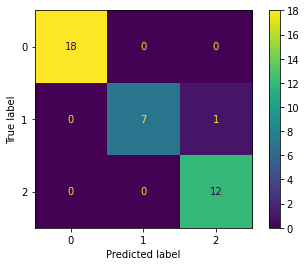

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm= confusion_matrix(y_test,y_pred)
display(cm)

plot_confusion_matrix(model_knn,X_test,y_test)

Se va a evaluar el accuracy que se obtiene a partir de la matriz confusión con la fórmula vista en clase:

$Accuracy=\frac{\sum_{} Valores-Diagonal-principal}{\sum_{} Todos-los-valores-de-la-matriz}$

$Accuracy=\frac{18+7+12}{18+7+12+1}=\frac{37}{38}=0.97368$

_________________________________

Como se ve el valor del **Accuracy** concuerda con la que se obtuvo en la celda 16

 

*   La primera columna nos dice que de las 18 flores que son Setosa (identificadas por el 0) todas fueron acertadas por por el modelo.
*   La segunda nos dice que de las 7 que eran Versicolor (identificadas por el 1) todas fueron acertadas por el modelo.
*   La última columna nos dice que de 13 que eran Virginica (identificadas por el 2) 12 fueron clasificados correctamente y una se clasificó como Versicolor.













**Ingreso manual de datos por parte del usuario para obtener la predicción:**

In [ ]:
lsepa=float(input('Insertar longitud del sépalo (cm): '))
wsepa=float(input('Insertar ancho del sépalo (cm): '))
lpeta=float(input('Insertar longitud del pétalo (cm): '))
wpeta=float(input('Insertar ancho del pétalo (cm): '))
especie=model_knn.predict([[lsepa,wsepa,lpeta,wpeta]]) #prueba con {1.2} {3.4} {5.6} {1.1} >>sería versicolor
especies=np.unique(iris_dataset['Species'])
print("\n","La especie es ",especies[especie[0]])


Insertar longitud del sépalo (cm): 1.2
Insertar ancho del sépalo (cm): 3.4
Insertar longitud del pétalo (cm): 5.2
Insertar ancho del pétalo (cm): 1.1

 La especie es  Iris-versicolor


# Prueba de análisis de complejidad con Cross Validation (en prueba)

Se va a recurrir al ejemplo mostrado en https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

"Un enfoque alternativo y más inteligente implica estimar la tasa de error de la prueba manteniendo un subconjunto del conjunto de entrenamiento del proceso de ajuste. Este subconjunto, llamado conjunto de validación, se puede utilizar para seleccionar el nivel apropiado de flexibilidad de nuestro algoritmo. Existen diferentes enfoques de validación que se utilizan en la práctica, y exploraremos uno de los más populares llamado validación cruzada k-fold".

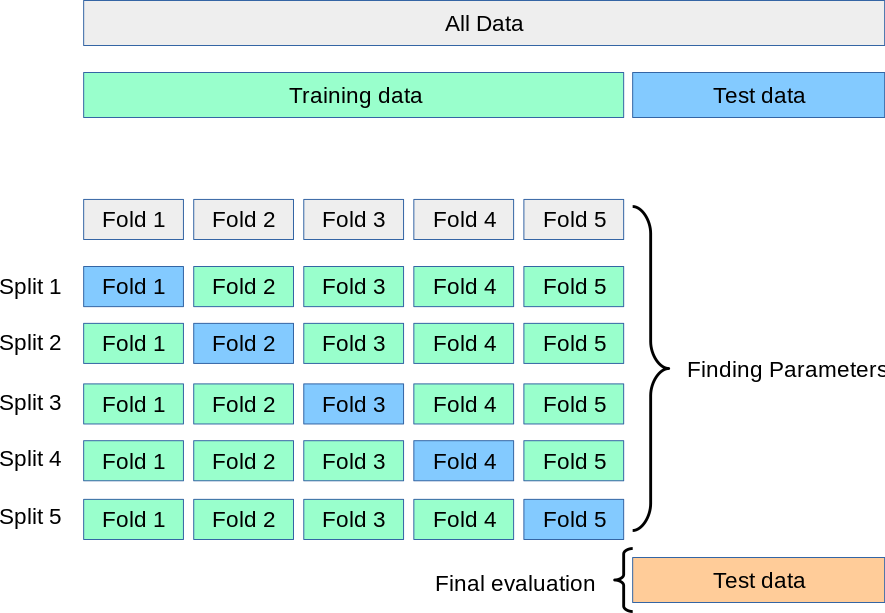

"Como se ve en la imagen, la validación cruzada de k-veces (la k no tiene ninguna relación con K) implica dividir aleatoriamente el conjunto de entrenamiento en k grupos, o pliegues, de aproximadamente el mismo tamaño. El primer pliegue se trata como un conjunto de validación y el método se ajusta a los k − 1 pliegues restantes. La tasa de clasificación errónea se calcula luego sobre las observaciones en el pliegue desplegado. Este procedimiento se repite k veces; cada vez, un grupo diferente de observaciones se trata como un conjunto de validación. Este proceso da como resultado k estimaciones del error de prueba que luego se promedian.

 La validación cruzada se puede utilizar para estimar el error de prueba asociado con un método de aprendizaje con el fin de evaluar su desempeño o para seleccionar el nivel apropiado de flexibilidad."


In [31]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 30, 1))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k2 in neighbors:
    knn2 = KNeighborsClassifier(n_neighbors=k2)
    scores = cross_val_score(knn2, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


The optimal number of neighbors is 10


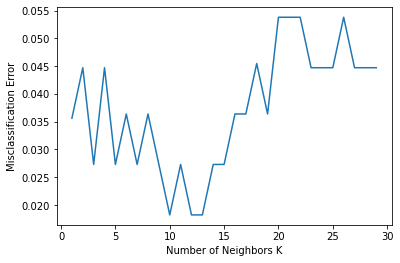

In [32]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()